In [1]:
# Datos: 
# https://drive.google.com/open?id=0B-dmEvN59Z2ZYWhJWXhvMExFRjQ

import pandas as pd  # importamos módulo pandas
import numpy as np

pm25 = pd.read_excel('03pm25ugm3.xls')  # Leemos archivo excel

# Espacios en blanco han sido leídos como strings
# reemplazamos celdas que contenga espacios en blanco
# por nan
# ^ caracter al inicio
# $ caracter al final
# \s cualquier espacio en blanco
# r'' raw string
pm25.replace(r'^\s*$', np.nan, regex=True, inplace = True)

pm25[:3]  # Primeros 3 registros

,ESTACION,MAGNITUD,ANO,MES,DIA,HORA1,HORA2,HORA3,HORA4,HORA5,...,HORA15,HORA16,HORA17,HORA18,HORA19,HORA20,HORA21,HORA22,HORA23,HORA24
0,COTOCOLLAO,PM2.5,2008,1,1,82.94,165.31,59.23,43.73,35.25,...,1.83,5.84,1.85,5.74,8.10,13.68,1.93,1.30,1.58,5.87
1,COTOCOLLAO,PM2.5,2008,1,2,1.52,2.76,2.70,2.44,8.88,...,1.23,6.33,2.31,3.83,2.52,6.63,13.84,7.40,2.42,2.68
2,COTOCOLLAO,PM2.5,2008,1,3,0.41,8.54,3.57,1.37,3.82,...,5.86,1.71,1.06,5.74,8.24,7.44,16.27,16.36,6.33,8.57


In [2]:
pm25['ESTACION'].describe()  # describe el dataframe

count         15877
unique            7
top       BELISARIO
freq           3141
Name: ESTACION, dtype: object

In [3]:
pm25.ESTACION.unique()  # Elementos únicos en ESTACION

array(['COTOCOLLAO', 'CARAPUNGO', 'BELISARIO', 'EL CAMAL', 'CENTRO',
       'GUAMANI', 'LOS CHILLOS'], dtype=object)

In [4]:
pm25.describe()

,ANO,MES,DIA,HORA1,HORA2,HORA3,HORA4,HORA5,HORA6,HORA7,...,HORA15,HORA16,HORA17,HORA18,HORA19,HORA20,HORA21,HORA22,HORA23,HORA24
count,15877.000000,15877.000000,15877.000000,15236.000000,15735.000000,15738.000000,15736.000000,15740.000000,15736.000000,15732.000000,...,15361.00000,15452.000000,15554.000000,15657.000000,15686.000000,15702.000000,15670.000000,15677.000000,15534.000000,13542.000000
mean,2011.871827,6.347862,15.697235,18.045639,17.522143,15.666597,15.036322,15.175451,16.764140,24.747702,...,14.90512,15.173436,15.345607,16.633985,17.877312,17.964799,18.387192,17.908218,16.677536,15.904846
std,2.503338,3.408190,8.804852,13.770792,18.217193,14.053011,12.360683,11.286948,10.868982,15.628660,...,10.70912,10.171950,9.554409,9.701766,9.258291,9.326566,9.520316,9.747207,9.599400,9.942222
min,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,3.000000,8.000000,9.320000,9.760000,8.280000,7.940000,8.070000,9.480000,14.340000,...,8.09000,8.530000,9.110000,10.540000,11.692500,11.460000,11.850000,11.120000,9.950000,8.970000
50%,2012.000000,6.000000,16.000000,16.425000,15.490000,13.920000,13.265000,13.640000,15.390000,22.060000,...,13.19000,13.650000,13.945000,15.400000,16.940000,16.890000,17.170000,16.520000,15.190000,14.210000
75%,2014.000000,9.000000,23.000000,24.202500,22.160000,20.590000,19.800000,20.210000,22.030000,31.600000,...,19.74000,19.880000,19.880000,21.270000,22.697500,23.020000,23.420000,22.880000,21.550000,20.827500
max,2016.000000,12.000000,31.000000,353.860000,648.380000,462.470000,416.260000,404.380000,342.540000,328.930000,...,329.47000,245.780000,177.600000,325.700000,161.870000,145.080000,142.810000,139.480000,141.500000,105.200000


In [5]:
pm25.isnull().sum()  # Devuelve los nan en cada columna

ESTACION       0
MAGNITUD       0
ANO            0
MES            0
DIA            0
HORA1        641
HORA2        142
HORA3        139
HORA4        141
HORA5        137
HORA6        141
HORA7        145
HORA8        162
HORA9        196
HORA10       246
HORA11       365
HORA12       498
HORA13       546
HORA14       515
HORA15       516
HORA16       425
HORA17       323
HORA18       220
HORA19       191
HORA20       175
HORA21       207
HORA22       200
HORA23       343
HORA24      2335
dtype: int64

In [6]:
# Las información en las columnas hora serán una sola columna
cols = ['HORA'+str(i+1) for i in range(24)]
cols

['HORA1',
 'HORA2',
 'HORA3',
 'HORA4',
 'HORA5',
 'HORA6',
 'HORA7',
 'HORA8',
 'HORA9',
 'HORA10',
 'HORA11',
 'HORA12',
 'HORA13',
 'HORA14',
 'HORA15',
 'HORA16',
 'HORA17',
 'HORA18',
 'HORA19',
 'HORA20',
 'HORA21',
 'HORA22',
 'HORA23',
 'HORA24']

In [7]:
# Realizamos la transformación
fd = pd.melt(pm25, id_vars=['ESTACION', 'ANO', 'MES', 'DIA'], value_vars=cols)

# Ordenamos
fd = fd.sort_values(['ESTACION', 'ANO', 'MES', 'DIA'])
fd[:3]

,ESTACION,ANO,MES,DIA,variable,value
6205,BELISARIO,2008,1,1,HORA1,48.68
22082,BELISARIO,2008,1,1,HORA2,97.01
37959,BELISARIO,2008,1,1,HORA3,93.51


In [8]:
# Convertimos a string las columnas especificadas
fd[['ANO', 'MES', 'DIA']] = fd[['ANO', 'MES', 'DIA']].astype(str)
fd['MES'] = fd['MES'].str.rjust(2,'0')  # Agregamos padding de 0s
# fd['DIA'] = fd['DIA'].str.rjust(2,'0')  # Agregamos padding de 0s

# Unimos DIA MES y ANO usando como separado /
fd['DATE'] = fd['DIA'].str.cat([fd['MES'], fd['ANO']], sep='/')

# Removemos HORA de la columna variable y agregamos padding de 0
# y sumamos minutos y segundos
fd['HORA'] = fd['variable'].str.replace('HORA', '')

# Hora va de 1 a 24, resto 1 para tener 0 a 23
# antes debo transformar el string a numérico para restar
# y vuelvo a trasnformar a string para concatenar mins y seg
fd['HORA'] =  (pd.to_numeric(fd['HORA'])-1).astype(str).str.rjust(2,'0') + ':00:00'

fd['DATE_TIME'] =  fd['DATE'].str.cat(fd['HORA'], sep=' ')

fd[:3]

,ESTACION,ANO,MES,DIA,variable,value,DATE,HORA,DATE_TIME
6205,BELISARIO,2008,01,1,HORA1,48.68,1/01/2008,00:00:00,1/01/2008 00:00:00
22082,BELISARIO,2008,01,1,HORA2,97.01,1/01/2008,01:00:00,1/01/2008 01:00:00
37959,BELISARIO,2008,01,1,HORA3,93.51,1/01/2008,02:00:00,1/01/2008 02:00:00


In [9]:
# Seleccionamos las columnas que nos interesan
datos_final = fd[['ESTACION', 'DATE_TIME', 'value']]

# Cambiamos nombres a las columnas
datos_final.rename(columns={'ESTACION': 'Station', 
                            'DATE_TIME': 'Date_time', 'value': 'pm25ugm3'}, inplace=True)
datos_final[:3]

# El warning se debe al cambio inplace que realizamos

/home/salva/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Station,Date_time,pm25ugm3
6205,BELISARIO,1/01/2008 00:00:00,48.68
22082,BELISARIO,1/01/2008 01:00:00,97.01
37959,BELISARIO,1/01/2008 02:00:00,93.51


In [10]:
# Guardar archivo csv
datos_final.to_csv('03pm25ugm3.csv', index=False)

In [11]:
# Vamos a listar los archivos csv en el directorio
# y guardar en una lista
# Archivos: https://drive.google.com/open?id=0B-dmEvN59Z2ZWTJBeENxMkE4WDg

import glob, os
# path = './data/'
path = "."
archivos = sorted(glob.glob(os.path.join(path, "0*.csv")))
archivos

['./00precipitation.mm.csv',
 './01wind_direction.deg.csv',
 './02wind_speed.ms.csv',
 './03pm25ugm3.csv']

In [12]:
# Leemos todos los archivos csv
dfs = [pd.read_csv(a) for a in archivos]

# Vamos a filtrar cada dataframe 
# por la estacion BELISARIO usando loc
# Eliminamos la información de Station (estación)
for i in range(len(dfs)):
    dfs[i] = dfs[i].loc[dfs[i]['Station'] == 'BELISARIO']
    dfs[i] = dfs[i].drop('Station', 1)

dfs[1][:3]

,Date_time,wind_direction.deg
0,1/01/2008 00:00:00,87.96
1,1/01/2008 01:00:00,72.26
2,1/01/2008 02:00:00,86.11


In [13]:
d_final = dfs[0]  # Asignamos a d_final el dataframe 0
for d in dfs[1:]:  # Del dataframe 1 al final
    # Realizamos un merge usando la fecha como clave
    d_final = d_final.merge(d, on='Date_time', how='left')

d_final

,Date_time,precipitation.mm,wind_direction.deg,wind_speed.ms,pm25ugm3
0,1/01/2008 00:00:00,0.0,87.96,1.57,48.68
1,1/01/2008 01:00:00,0.0,72.26,1.53,97.01
2,1/01/2008 02:00:00,0.0,86.11,2.22,93.51
3,1/01/2008 03:00:00,0.0,76.69,1.85,61.88
4,1/01/2008 04:00:00,0.0,107.54,1.23,41.20
5,1/01/2008 05:00:00,0.0,103.30,1.96,37.75
6,1/01/2008 06:00:00,0.0,106.73,1.40,27.90
7,1/01/2008 07:00:00,0.0,181.36,1.09,23.04
8,1/01/2008 08:00:00,0.0,99.47,2.60,23.55
9,1/01/2008 09:00:00,0.0,83.19,2.98,15.89


In [14]:
# Guardamos el resultado en un archivo csv
# no incluimos el índice primera columna en negrita arriba
d_final.to_csv("BELISARIO_pandas.csv", index=False)

In [15]:
# Eliminamos registros en el eje 0 filas
# how=any, cualquier fila que tenga un nan es eliminada
d_final = d_final.dropna(axis=0, how='any')
d_final.to_csv("BELISARIO_pandas_nmv.csv", index=False)
d_final

,Date_time,precipitation.mm,wind_direction.deg,wind_speed.ms,pm25ugm3
0,1/01/2008 00:00:00,0.0,87.96,1.57,48.68
1,1/01/2008 01:00:00,0.0,72.26,1.53,97.01
2,1/01/2008 02:00:00,0.0,86.11,2.22,93.51
3,1/01/2008 03:00:00,0.0,76.69,1.85,61.88
4,1/01/2008 04:00:00,0.0,107.54,1.23,41.20
5,1/01/2008 05:00:00,0.0,103.30,1.96,37.75
6,1/01/2008 06:00:00,0.0,106.73,1.40,27.90
7,1/01/2008 07:00:00,0.0,181.36,1.09,23.04
8,1/01/2008 08:00:00,0.0,99.47,2.60,23.55
9,1/01/2008 09:00:00,0.0,83.19,2.98,15.89


In [16]:
# Archivo: https://drive.google.com/open?id=0B-dmEvN59Z2ZUWlXVE40MEI5VEU
datos = pd.read_csv("BelisarioMV.csv")
datos[:3]

,DATE,PRECIPITATION(mm),WINDDIR(deg),WINDDPEED(m/s),PARTICULAS(microg/m3)
0,01/06/2007,9.3,125.09,1.91,24.84
1,04/06/2007,0.1,200.03,2.77,17.81
2,05/06/2007,0.0,178.09,3.24,15.86


In [17]:
# No usaremos la fecha, es un premdio diario sin fines de semana
datos = datos[['PRECIPITATION(mm)', 'WINDDIR(deg)', 'WINDDPEED(m/s)', 'PARTICULAS(microg/m3)']]
datos[:3]

,PRECIPITATION(mm),WINDDIR(deg),WINDDPEED(m/s),PARTICULAS(microg/m3)
0,9.3,125.09,1.91,24.84
1,0.1,200.03,2.77,17.81
2,0.0,178.09,3.24,15.86


In [18]:
datos.isnull().sum()  # contamos los nan

PRECIPITATION(mm)         2
WINDDIR(deg)             27
WINDDPEED(m/s)           14
PARTICULAS(microg/m3)    40
dtype: int64

In [19]:
datos.describe()

,PRECIPITATION(mm),WINDDIR(deg),WINDDPEED(m/s),PARTICULAS(microg/m3)
count,1585.000000,1560.000000,1573.000000,1547.000000
mean,3.111483,115.795154,1.888563,18.421028
std,6.199882,60.975295,0.619789,5.528733
min,0.000000,0.020000,0.250000,5.740000
25%,0.000000,71.767500,1.540000,14.745000
50%,0.100000,116.285000,1.730000,18.190000
75%,3.100000,154.662500,2.070000,21.870000
max,40.300000,359.400000,6.240000,57.110000


In [20]:
# Funciones lambda
# https://stackoverflow.com/questions/890128/why-are-python-lambdas-useful
# Vamos a reemplazar los valores faltantes por la media
# apply:
# 0 or ‘index’: apply function to each column
# 1 or ‘columns’: apply function to each row
datos = datos.apply(lambda x: x.fillna(x.mean()), axis=0)
datos.isnull().sum()

PRECIPITATION(mm)        0
WINDDIR(deg)             0
WINDDPEED(m/s)           0
PARTICULAS(microg/m3)    0
dtype: int64

In [21]:
datos.describe()

,PRECIPITATION(mm),WINDDIR(deg),WINDDPEED(m/s),PARTICULAS(microg/m3)
count,1587.000000,1587.000000,1587.000000,1587.000000
mean,3.111483,115.795154,1.888563,18.421028
std,6.195972,60.454046,0.617047,5.458568
min,0.000000,0.020000,0.250000,5.740000
25%,0.000000,72.540000,1.540000,14.865000
50%,0.100000,115.795154,1.740000,18.360000
75%,3.111483,153.545000,2.065000,21.730000
max,40.300000,359.400000,6.240000,57.110000


In [22]:
# Replicaremos las transformaciones realizadas en R

datos['X'] = np.cos(datos['WINDDIR(deg)']*np.pi/180)*datos['WINDDPEED(m/s)']
datos['Y'] = np.sin(datos['WINDDIR(deg)']*np.pi/180)*datos['WINDDPEED(m/s)']
datos['PL2'] = np.where(datos['PARTICULAS(microg/m3)']>=15, 'UH', 'H')
datos['PL3'] = np.where(datos['PARTICULAS(microg/m3)']<10, 'L', 
                        np.where(datos['PARTICULAS(microg/m3)']<25, 'M', 'H'))
datos[:10]

,PRECIPITATION(mm),WINDDIR(deg),WINDDPEED(m/s),PARTICULAS(microg/m3),X,Y,PL2,PL3
0,9.3,125.09,1.91,24.84,-1.097987,1.562858,UH,M
1,0.1,200.03,2.77,17.81,-2.602452,-0.948759,UH,M
2,0.0,178.09,3.24,15.86,-3.238200,0.107988,UH,M
3,0.0,45.07,2.56,26.33,1.807980,1.812404,UH,H
4,0.0,44.83,2.09,23.46,1.482232,1.473462,UH,M
5,0.1,85.26,2.37,21.83,0.195843,2.361894,UH,M
6,0.0,66.72,2.53,14.72,0.999919,2.324019,H,M
7,0.0,39.28,2.40,16.98,1.857747,1.519466,UH,M
8,0.6,13.12,2.43,14.31,2.366569,0.551589,H,M
9,0.8,126.14,2.25,17.20,-1.326961,1.817051,UH,M


In [23]:
# Guardamos ciertas columnas en dependencia del analisis
# que se realizará eventualmente
datos_regresion = datos[['X', 'Y', 'PRECIPITATION(mm)', 'PARTICULAS(microg/m3)']]
datos_binclass = datos[['X', 'Y', 'PRECIPITATION(mm)', 'PL2']]
datos_mulclass = datos[['X', 'Y', 'PRECIPITATION(mm)', 'PL3']]
datos_regresion.to_csv("regressionData_pandas.csv", index=False)
datos_binclass.to_csv("binClassData_pandas.csv", index=False)
datos_mulclass.to_csv("mulClassData_pandas.csv", index=False)

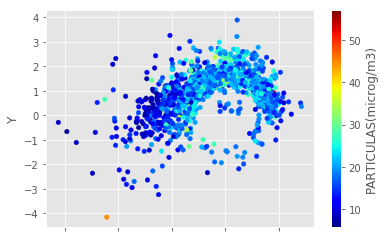

In [24]:
# Visualización de datos usando Pandas
# Para colormap ver: 
# https://matplotlib.org/examples/color/colormaps_reference.html
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from matplotlib import cm

datos_regresion.plot.scatter('X', 'Y', c='PARTICULAS(microg/m3)', colormap=cm.jet)
plt.show()

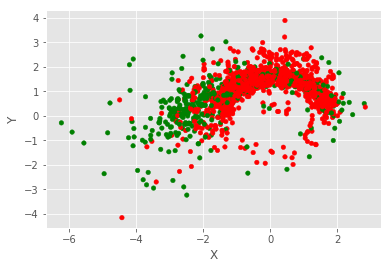

In [25]:
datos_bin = pd.read_csv("binClassData_pandas.csv")
colclass = {'H':'green', 'UH':'red'}
colores = datos_bin['PL2'].apply(lambda x: colclass[x])
datos_bin.plot.scatter('X', 'Y', c=colores)
plt.show()

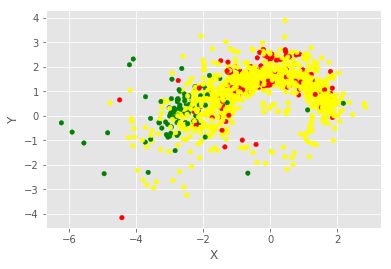

In [26]:
datos_mul = pd.read_csv("mulClassData_pandas.csv")
colors = {'H':'red', 'M': 'yellow', 'L':'green'}
colores = datos_mul['PL3'].apply(lambda x: colors[x])
datos_mul.plot.scatter('X', 'Y', c=colores)
plt.show()

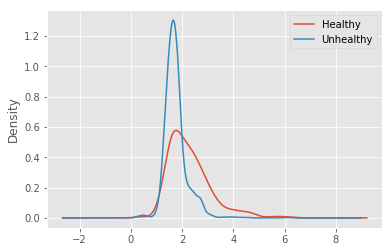

In [27]:
colores = datos['PL2'].apply(lambda x: colclass[x])
datos['WINDDPEED(m/s)'].groupby(datos['PL2']).plot(kind='kde')
plt.legend(("Healthy", "Unhealthy"))
plt.show()

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


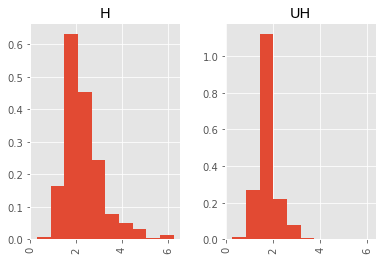

In [28]:
datos['WINDDPEED(m/s)'].hist(by=datos['PL2'], normed=True)
plt.show()

/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


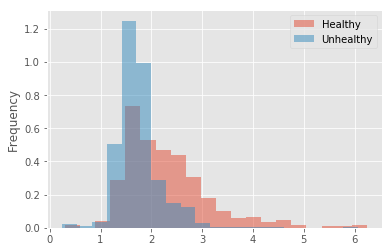

In [29]:
datos['WINDDPEED(m/s)'].groupby(datos['PL2']).plot(kind='hist', normed=1, bins=20, stacked=True, alpha=.5)
plt.legend(("Healthy", "Unhealthy"))
plt.show()

In [30]:
belisario = pd.read_csv("BELISARIO_pandas_nmv.csv", index_col=[0], parse_dates=[0], dayfirst=True)
belisario.head()

,precipitation.mm,wind_direction.deg,wind_speed.ms,pm25ugm3
Date_time,,,,
2008-01-01 00:00:00,0.0,87.96,1.57,48.68
2008-01-01 01:00:00,0.0,72.26,1.53,97.01
2008-01-01 02:00:00,0.0,86.11,2.22,93.51
2008-01-01 03:00:00,0.0,76.69,1.85,61.88
2008-01-01 04:00:00,0.0,107.54,1.23,41.20


In [31]:
belisario.tail()

,precipitation.mm,wind_direction.deg,wind_speed.ms,pm25ugm3
Date_time,,,,
2016-08-23 03:00:00,0.0,214.8,3.38,8.00
2016-08-23 04:00:00,0.0,218.4,3.94,4.00
2016-08-23 05:00:00,0.0,202.1,3.35,2.77
2016-08-23 06:00:00,0.0,215.3,3.43,3.07
2016-08-23 07:00:00,0.0,205.1,3.43,3.58


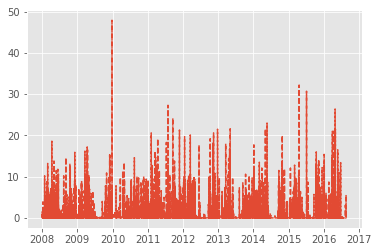

In [32]:
plt.plot(belisario.index, belisario['precipitation.mm'], '--')
plt.show()

In [33]:
m_summary = pd.DataFrame()
m_summary['precipitation.mm'] = belisario['precipitation.mm'].resample('M').mean()
m_summary.head()

,precipitation.mm
Date_time,
2008-01-31,0.186061
2008-02-29,0.368892
2008-03-31,0.232397
2008-04-30,0.311142
2008-05-31,0.273871


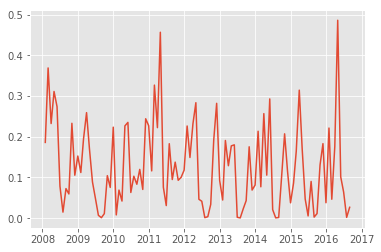

In [34]:
plt.plot(m_summary.index, m_summary['precipitation.mm'], '-')
plt.show()